# Neural Network with Keras

This notebook is for modelling with data already split into training, validation and testing sets.  
There are 15 variables (principal components) and 1 response (binary label).

Note: keras model implementation has bias nodes as defualt, that is, for a dense layer, the operation is:  
output = activation(dot(input, kernel) + bias)  
The bias values are learnable parameters as well.

### Load Data and Packages

In [1]:
# pip install tensorflow
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import tensorflow.keras.metrics as met

In [2]:
# conda install scikit-learn
import sklearn

In [3]:
import sklearn.metrics

In [4]:
import matplotlib.pyplot as plt

In [5]:
pwd

'C:\\Users\\joann\\Downloads\\ST4248\\project\\C3 Work Done\\Neural Network Codes'

In [6]:
os.chdir("C:\\Users\\joann\\Downloads\\ST4248\\project\\Datasets\\6-1-3-80_PC_Data")

In [7]:
pwd

'C:\\Users\\joann\\Downloads\\ST4248\\project\\Datasets\\6-1-3-80_PC_Data'

In [8]:
# load the dataset
trng_dat = pd.read_csv('trng_dat.csv')
vali_dat = pd.read_csv('vali_dat.csv')
test_dat = pd.read_csv('test_dat.csv')

In [9]:
trng_dat.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,Y
0,0.081731,-0.661175,0.109229,0.067420,0.312268,0.096423,0.435701,1.101748,-0.368736,0.417473,0.228591,-0.117218,0.562005,-0.446329,-0.097690,0
1,-4.339643,-0.112268,0.138075,-0.299480,-0.259801,-0.184745,-0.470181,-1.081109,0.368687,0.049428,-0.091747,0.225501,-0.583932,-0.109638,-0.810762,0
2,1.009107,0.725425,-0.026342,0.093173,-0.592424,0.427387,-0.338568,-0.501980,0.739033,0.143743,0.230911,0.156602,-0.464527,0.150289,0.002188,0
3,-3.106093,-0.815408,0.061191,0.899890,-0.554849,0.221659,-0.361999,0.831509,0.050661,-0.142333,0.031356,-0.136588,0.326729,0.317589,0.446302,0
4,-1.072274,-2.476202,0.189762,0.836661,-0.718956,0.348189,0.771177,-0.456119,0.383499,0.485279,0.196885,0.946903,0.063486,-0.182056,-0.889519,0


In [10]:
# split into input and output variables

trng_x = trng_dat.iloc[:, :15]
trng_y = trng_dat.iloc[:, 15]

vali_x = vali_dat.iloc[:, :15]
vali_y = vali_dat.iloc[:, 15]

test_x = test_dat.iloc[:, :15]
test_y = test_dat.iloc[:, 15]

*set up user defined function to calculate false positive rate*

In [11]:
fpr = lambda mfc: mfc[1][0]/(mfc[0][0]+mfc[1][0])

### Model 1: Baseline Model

*set up, compile and fit model*

In [65]:
model_one = Sequential()
model_one.add(Dense(8, input_shape=(15,), activation='relu'))
model_one.add(Dense(1, activation='sigmoid'))

model_one.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=[])

model_one.fit(trng_x, trng_y, epochs=20, batch_size=64, verbose = 0);
print("model has been fitted")

model has been fitted


*evaluate model on validation set (before threshold tuning)*

In [66]:
predictions_one = model_one.predict(vali_x)

22/22 [==============================] - 0s 1ms/step


In [67]:
class_predictions_one_ptone = [(ele[0] > 0.5).astype(int) for ele in predictions_one]
table_one_ptone = pd.DataFrame({'actual':vali_y, 'pred':class_predictions_one_ptone})
cfm_one_ptone = pd.crosstab(table_one_ptone['actual'], table_one_ptone['pred'], 
                            rownames=['actual'], colnames=['pred'])

In [68]:
cfm_one_ptone

pred,0,1
actual,,
0,431,221
1,1,20


In [69]:
prec_one_ptone = sklearn.metrics.precision_score(y_true = vali_y, 
                                                 y_pred = class_predictions_one_ptone, 
                                                 zero_division = 0)
rec_one_ptone = sklearn.metrics.recall_score(y_true = vali_y, 
                                             y_pred = class_predictions_one_ptone, 
                                             zero_division = 0)
f2_one_ptone = sklearn.metrics.fbeta_score(y_true = vali_y, 
                                           y_pred = class_predictions_one_ptone, 
                                           beta = 2)

print(f"precision is {prec_one_ptone:.6f}")
print(f"recall is {rec_one_ptone:.6f}")
print(f"f2 is {f2_one_ptone:.6f}")
print(f"fpr is {fpr(cfm_one_ptone):.6f}")

precision is 0.082988
recall is 0.952381
f2 is 0.307692
fpr is 0.338957


*find the best threshold using validation set*

In [70]:
f2_val_one = []
prec_val_one = []
rec_val_one = []

threshold_values = np.linspace(0, 1, 21)

for thres in threshold_values:
    class_predictions = [(ele[0] > thres).astype(int) for ele in predictions_one]
    
    prec_met = sklearn.metrics.precision_score(y_true = vali_y, y_pred = class_predictions, zero_division = 0)
    rec_met = sklearn.metrics.recall_score(y_true = vali_y, y_pred = class_predictions, zero_division = 0)
    f2_met = sklearn.metrics.fbeta_score(y_true = vali_y, y_pred = class_predictions, beta = 2)
    
    f2_val_one.append(f2_met)
    prec_val_one.append(prec_met)
    rec_val_one.append(rec_met)

In [71]:
df_one = pd.DataFrame({'threshold': threshold_values, 
              'precision' : prec_val_one, 
              'recall': rec_val_one, 
              'f2': f2_val_one})

In [105]:
df_one.to_csv("C:\\Users\\joann\\Downloads\\ST4248\\project\\df_one.csv")

In [72]:
df_one

,threshold,precision,recall,f2
0,0.00,0.031204,1.000000,0.138705
1,0.05,0.041750,1.000000,0.178876
2,0.10,0.049412,1.000000,0.206287
3,0.15,0.054688,1.000000,0.224359
4,0.20,0.060000,1.000000,0.241935
5,0.25,0.065217,1.000000,0.258621
6,0.30,0.069307,1.000000,0.271318
7,0.35,0.073171,1.000000,0.283019
8,0.40,0.074627,0.952381,0.284091
9,0.45,0.079365,0.952381,0.297619


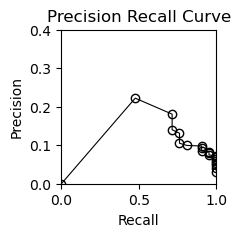

In [73]:
# plot PRC
plt.figure(figsize=(2, 2))
plt.plot(rec_val_one, prec_val_one, "ko-", markerfacecolor = "none", lw = 0.8)
plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 0.4]);

*evaluate performance on validation with selected threshold*

In [74]:
threshold_one = 0.50
class_predictions_one_pttwo = [(ele[0] > threshold_one).astype(int) for ele in predictions_one]
table_one_pttwo = pd.DataFrame({'actual':vali_y, 'pred':class_predictions_one_pttwo})
cfm_one_pttwo = pd.crosstab(table_one_pttwo['actual'], table_one_pttwo['pred'], 
                            rownames=['actual'], colnames=['pred'])

In [75]:
cfm_one_pttwo

pred,0,1
actual,,
0,431,221
1,1,20


In [76]:
prec_one_pttwo = sklearn.metrics.precision_score(y_true = vali_y, 
                                                 y_pred = class_predictions_one_pttwo, 
                                                 zero_division = 0)
rec_one_pttwo = sklearn.metrics.recall_score(y_true = vali_y, 
                                             y_pred = class_predictions_one_pttwo, 
                                             zero_division = 0)
f2_one_pttwo = sklearn.metrics.fbeta_score(y_true = vali_y, 
                                           y_pred = class_predictions_one_pttwo, 
                                           beta = 2)

print(f"precision is {prec_one_pttwo:.6f}")
print(f"recall is {rec_one_pttwo:.6f}")
print(f"f2 is {f2_one_pttwo:.6f}")
print(f"fpr is {fpr(cfm_one_pttwo):.6f}")

precision is 0.082988
recall is 0.952381
f2 is 0.307692
fpr is 0.338957


*evaluate performance on test set*

In [77]:
predictions_one_test = model_one.predict(test_x)

class_predictions_one_test = [(ele[0] > threshold_one).astype(int) for ele in predictions_one_test]
table_one_test = pd.DataFrame({'actual':test_y, 'pred':class_predictions_one_test})
cfm_one_test = pd.crosstab(table_one_test['actual'], table_one_test['pred'], 
                            rownames=['actual'], colnames=['pred'])

64/64 [==============================] - 0s 1ms/step


In [78]:
cfm_one_test

pred,0,1
actual,,
0,1324,628
1,2,69


In [26]:
prec_one_test = sklearn.metrics.precision_score(y_true = test_y, 
                                                 y_pred = class_predictions_one_test, 
                                                 zero_division = 0)
rec_one_test = sklearn.metrics.recall_score(y_true = test_y, 
                                             y_pred = class_predictions_one_test, 
                                             zero_division = 0)
f2_one_test = sklearn.metrics.fbeta_score(y_true = test_y, 
                                           y_pred = class_predictions_one_test, 
                                           beta = 2)

print(f"precision is {prec_one_test:.6f}")
print(f"recall is {rec_one_test:.6f}")
print(f"f2 is {f2_one_test:.6f}")
print(f"fpr is {fpr(cfm_one_test):.6f}")

precision is 0.126214
recall is 0.915493
f2 is 0.406758
fpr is 0.230533


### Model 3: Model to be tuned with cross-validated Recall and Precision

**Tune Training Model** - Cross Validated RECALL AND PRECISION
1. number of hidden layers and nodes
2. type of activation - based on research, it is best to stick with relu and sigmoid.
3. regularisation
4. batch size and epochs

**Tune Training Model** - Precision Recall Curve
1. Threshold 

*preparing 10 folds of training data for 10-fold cross validation*

In [79]:
from sklearn.model_selection import KFold

In [80]:
k = 10
kf = KFold(n_splits = 10, shuffle = True, random_state = 4248)

**Results**


1. number of hidden layers and nodes


3. regularisation


4. batch size and epochs

**network configuration:**

1. threshold value

*find the best number of nodes for a first hidden layer*

In [86]:
hidden_nodes = [4, 6, 8, 10, 12, 14]
training_accuracies = {ele:[] for ele in hidden_nodes}
recall_records = {ele:[] for ele in hidden_nodes}
precision_records = {ele:[] for ele in hidden_nodes}

for i in range(len(hidden_nodes)): ## finding best number of hidden nodes for single layer
    hl_size = hidden_nodes[i]
    print(f"starting 10f-cv for {hl_size} hidden nodes")
    
    for train_idx, vali_idx in kf.split(trng_x): ## perform k-fold cross validation

        # get current training and validation folds
        trainfold_x = trng_x.loc[train_idx] ## k-1 folds
        valifold_x = trng_x.loc[vali_idx]

        trainfold_y = trng_y.loc[train_idx] # 1 fold
        valifold_y = trng_y.loc[vali_idx]

        # set up model
        model = Sequential()
        model.add(Dense(hl_size, input_shape=(15,), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        # compile model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # fit model
        model.fit(trainfold_x, trainfold_y, epochs = 20, batch_size = 64, verbose = 0)

        # get model's cross-validated accuracy
        predictions = model.predict(valifold_x, verbose = 0)
        class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
        table = pd.DataFrame({'actual':valifold_y, 'pred':class_predictions})
        cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

        accuracy = (cfm[0][0] + cfm[1][1]) / len(valifold_y)
        training_accuracies[hidden_nodes[i]].append(accuracy)
        
        recall_records[hidden_nodes[i]].append(sklearn.metrics.recall_score(y_true = valifold_y, 
                                                 y_pred = class_predictions, 
                                                 zero_division = 0))
        precision_records[hidden_nodes[i]].append(sklearn.metrics.precision_score(y_true = valifold_y, 
                                                 y_pred = class_predictions, 
                                                 zero_division = 0))

        
print("run has completed!")

starting 10f-cv for 4 hidden nodes
starting 10f-cv for 6 hidden nodes
starting 10f-cv for 8 hidden nodes
starting 10f-cv for 10 hidden nodes
starting 10f-cv for 12 hidden nodes
starting 10f-cv for 14 hidden nodes
run has completed!


In [137]:
# cross validated accuracy
{k: f"{100*sum(v)/len(v):.6f}" for k,v in training_accuracies.items()}

{4: '85.876224',
 6: '86.532918',
 8: '86.831560',
 10: '87.204694',
 12: '87.219865',
 14: '87.712402'}

In [87]:
{k: f"{sum(v)/len(v):.6f}" for k,v in recall_records.items()}

{4: '0.847086',
 6: '0.844809',
 8: '0.847170',
 10: '0.851304',
 12: '0.850061',
 14: '0.852778'}

In [88]:
{k: f"{sum(v)/len(v):.6f}" for k,v in precision_records.items()}

{4: '0.829176',
 6: '0.833866',
 8: '0.842286',
 10: '0.845429',
 12: '0.840597',
 14: '0.847081'}

In [89]:
cfm

pred,0,1
actual,,
0,337,55
1,29,248


Conclusion: **Use 4 nodes since increasing the nodes only gave 1-2% improvement to recall/precision**

*find the best number of nodes for a second hidden layer*

In [90]:
hidden_layers = [4, 6, 8, 10, 12, 14]
training_accuracies = {ele:[] for ele in hidden_layers}
recall_records = {ele:[] for ele in hidden_layers}
precision_records = {ele:[] for ele in hidden_layers}

for i in range(len(hidden_nodes)): ## finding best number of hidden layers
    hl_size = hidden_nodes[i]
    print(f"starting 10f-cv for {hl_size} hidden nodes")
    
    for train_idx, vali_idx in kf.split(trng_x): ## perform k-fold cross validation

        # get current training and validation folds
        trainfold_x = trng_x.loc[train_idx] ## k-1 folds
        valifold_x = trng_x.loc[vali_idx]

        trainfold_y = trng_y.loc[train_idx] # 1 fold
        valifold_y = trng_y.loc[vali_idx]

        # set up model
        model = Sequential()
        model.add(Dense(4, input_shape=(15,), activation='relu')) # using the best # nodes = 14
        model.add(Dense(hl_size, activation = 'relu'))
        model.add(Dense(1, activation='sigmoid'))

        # compile model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # fit model
        model.fit(trainfold_x, trainfold_y, epochs = 20, batch_size = 64, verbose = 0)

        # get model's cross-validated accuracy
        predictions = model.predict(valifold_x, verbose = 0)
        class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
        table = pd.DataFrame({'actual':valifold_y, 'pred':class_predictions})
        cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

        accuracy = (cfm[0][0] + cfm[1][1]) / len(valifold_y)
        training_accuracies[hidden_layers[i]].append(accuracy)
        
        recall_records[hidden_layers[i]].append(sklearn.metrics.recall_score(y_true = valifold_y, 
                                                 y_pred = class_predictions, 
                                                 zero_division = 0))
        precision_records[hidden_layers[i]].append(sklearn.metrics.precision_score(y_true = valifold_y, 
                                                 y_pred = class_predictions, 
                                                 zero_division = 0))
        
print("run has completed!")

starting 10f-cv for 4 hidden nodes
starting 10f-cv for 6 hidden nodes
starting 10f-cv for 8 hidden nodes
starting 10f-cv for 10 hidden nodes
starting 10f-cv for 12 hidden nodes
starting 10f-cv for 14 hidden nodes
run has completed!


In [139]:
# cross validated accuracy
{k: f"{100*sum(v)/len(v):.6f}" for k,v in training_accuracies.items()}

{4: '88.966580',
 6: '89.474109',
 8: '89.205586',
 10: '89.295049',
 12: '89.578498',
 14: '89.668184'}

In [91]:
{k: f"{sum(v)/len(v):.6f}" for k,v in recall_records.items()}

{4: '0.837429',
 6: '0.846749',
 8: '0.856177',
 10: '0.850352',
 12: '0.845113',
 14: '0.844973'}

In [92]:
{k: f"{sum(v)/len(v):.6f}" for k,v in precision_records.items()}

{4: '0.834387',
 6: '0.836477',
 8: '0.836356',
 10: '0.833739',
 12: '0.845066',
 14: '0.833685'}

Conclusion: **Do not use second hidden layer.**

*finding a suitable regularisation amount for a dropout layer*

In [93]:
reg_degrees = [0.2, 0.25, 0.3, 0.35, 0.4]
training_accuracies = {ele:[] for ele in reg_degrees}
fitted_data_accuracies = {ele:[] for ele in reg_degrees}
recall_records = {ele:[] for ele in reg_degrees}
precision_records = {ele:[] for ele in reg_degrees}

for i in range(len(reg_degrees)): ## finding best regularisation
    degree = reg_degrees[i]
    print(f"starting 10f-cv for {degree} dropout")

    for train_idx, vali_idx in kf.split(trng_x): ## perform k-fold cross validation

        # get current training and validation folds
        trainfold_x = trng_x.loc[train_idx] ## k-1 folds
        valifold_x = trng_x.loc[vali_idx]

        trainfold_y = trng_y.loc[train_idx] # 1 fold
        valifold_y = trng_y.loc[vali_idx]

        # set up model
        model = Sequential()
        model.add(Dropout(degree))
        model.add(Dense(4, activation = 'relu'))
        model.add(Dense(1, activation='sigmoid'))

        # compile model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # fit model
        model.fit(trainfold_x, trainfold_y, epochs = 20, batch_size = 64, verbose = 0)
        
#         # NEW! get model's accuracy on the data it was fitted on (on k-1 folds)
#         predictions = model.predict(trainfold_x, verbose = 0)
#         class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
#         table = pd.DataFrame({'actual':trainfold_y, 'pred':class_predictions})
#         cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

#         fd_accuracy = (cfm[0][0] + cfm[1][1]) / len(trainfold_y)
#         fitted_data_accuracies[reg_degrees[i]].append(fd_accuracy)

        # get model's cross-validated accuracy
        predictions = model.predict(valifold_x, verbose = 0)
        class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
        table = pd.DataFrame({'actual':valifold_y, 'pred':class_predictions})
        cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

        accuracy = (cfm[0][0] + cfm[1][1]) / len(valifold_y)
        training_accuracies[reg_degrees[i]].append(accuracy)
        
        recall_records[reg_degrees[i]].append(sklearn.metrics.recall_score(y_true = valifold_y, 
                                                 y_pred = class_predictions, 
                                                 zero_division = 0))
        precision_records[reg_degrees[i]].append(sklearn.metrics.precision_score(y_true = valifold_y, 
                                                 y_pred = class_predictions, 
                                                 zero_division = 0))
        
print("run has completed!")

starting 10f-cv for 0.2 dropout
starting 10f-cv for 0.25 dropout
starting 10f-cv for 0.3 dropout
starting 10f-cv for 0.35 dropout
starting 10f-cv for 0.4 dropout
run has completed!


In [142]:
# cross validated accuracy
{k: f"{100*sum(v)/len(v):.6f}" for k,v in training_accuracies.items()}

{0.2: '88.235080',
 0.25: '87.936372',
 0.3: '87.682306',
 0.35: '87.876849',
 0.4: '87.996185'}

In [94]:
{k: f"{sum(v)/len(v):.6f}" for k,v in recall_records.items()}

{0.2: '0.849975',
 0.25: '0.836929',
 0.3: '0.835706',
 0.35: '0.846334',
 0.4: '0.842267'}

In [95]:
{k: f"{sum(v)/len(v):.6f}" for k,v in precision_records.items()}

{0.2: '0.821000',
 0.25: '0.824046',
 0.3: '0.819405',
 0.35: '0.812584',
 0.4: '0.817861'}

Conclusion: **No regularisation used.**

*try to find a suitable batch size*

In [96]:
# Check if changing batch size will improve performance 

batch_sizes = [32, 64, 128, 256]
training_accuracies = {ele:[] for ele in batch_sizes}
fitted_data_accuracies = {ele:[] for ele in batch_sizes}
recall_records = {ele:[] for ele in batch_sizes}
precision_records = {ele:[] for ele in batch_sizes}

for i in range(len(batch_sizes)): ## finding best batch size
    batch_size = batch_sizes[i]
    print(f"starting 10f-cv for batch size {batch_size}")

    for train_idx, vali_idx in kf.split(trng_x): ## perform k-fold cross validation

        # get current training and validation folds
        trainfold_x = trng_x.loc[train_idx] ## k-1 folds
        valifold_x = trng_x.loc[vali_idx]

        trainfold_y = trng_y.loc[train_idx] # 1 fold
        valifold_y = trng_y.loc[vali_idx]

        # set up model
        model = Sequential()
        model.add(Dense(4, activation = 'relu'))
        model.add(Dense(1, activation='sigmoid'))

        # compile model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # fit model
        model.fit(trainfold_x, trainfold_y, epochs = 20, batch_size = batch_size, verbose = 0)
        
#         # NEW! get model's accuracy on the data it was fitted on (on k-1 folds)
#         predictions = model.predict(trainfold_x, verbose = 0)
#         class_predictions = [(ele[0] > threshold).astype(int) for ele in predictions]
#         table = pd.DataFrame({'actual':trainfold_y, 'pred':class_predictions})
#         cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

#         fd_accuracy = (cfm[0][0] + cfm[1][1]) / len(trainfold_y)
#         fitted_data_accuracies[batch_sizes[i]].append(fd_accuracy)

        # get model's cross-validated accuracy
        predictions = model.predict(valifold_x, verbose = 0)
        class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
        table = pd.DataFrame({'actual':valifold_y, 'pred':class_predictions})
        cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

        accuracy = (cfm[0][0] + cfm[1][1]) / len(valifold_y)
        training_accuracies[batch_sizes[i]].append(accuracy)
        
        recall_records[batch_sizes[i]].append(sklearn.metrics.recall_score(y_true = valifold_y, 
                                                 y_pred = class_predictions, 
                                                 zero_division = 0))
        precision_records[batch_sizes[i]].append(sklearn.metrics.precision_score(y_true = valifold_y, 
                                                 y_pred = class_predictions, 
                                                 zero_division = 0))
        
print("run has completed!")

starting 10f-cv for batch size 32
starting 10f-cv for batch size 64
starting 10f-cv for batch size 128
starting 10f-cv for batch size 256
run has completed!


In [146]:
# cross validated accuracy
{k: f"{100*sum(v)/len(v):.6f}" for k,v in training_accuracies.items()}

{32: '91.176427', 64: '89.967182', 128: '87.966200', 256: '87.309417'}

In [97]:
{k: f"{sum(v)/len(v):.6f}" for k,v in recall_records.items()}

{32: '0.849310', 64: '0.851933', 128: '0.838868', 256: '0.822728'}

In [98]:
{k: f"{sum(v)/len(v):.6f}" for k,v in precision_records.items()}

{32: '0.827491', 64: '0.831987', 128: '0.819057', 256: '0.813580'}

Conclusion: **Batch Size 64.**

*Observe if we can use a higher number of epochs*  
If validation loss continues to decrease, we can continue.

In [99]:
training_accuracies = []
fitted_data_accuracies = []

histories = {ele:[] for ele in range(k)}

for i, (train_idx, vali_idx) in enumerate(kf.split(trng_x)): ## perform k-fold cross validation

    # get current training and validation folds
    trainfold_x = trng_x.loc[train_idx] ## k-1 folds
    valifold_x = trng_x.loc[vali_idx]

    trainfold_y = trng_y.loc[train_idx] # 1 fold
    valifold_y = trng_y.loc[vali_idx]

    # set up model
    model = Sequential()
    model.add(Dense(4, input_shape=(15,), activation='relu')) # using the best # nodes = 14
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit model
    history = model.fit(trainfold_x, trainfold_y, epochs = 60, batch_size = 64, 
             validation_data = (valifold_x, valifold_y), verbose = 0)
    
    histories[i].append(history)
    
    print(f"model fitted for one fold!")
    
#     # NEW! get model's accuracy on the data it was fitted on (on k-1 folds)
#     predictions = model.predict(trainfold_x, verbose = 0)
#     class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
#     table = pd.DataFrame({'actual':trainfold_y, 'pred':class_predictions})
#     cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

#     fd_accuracy = (cfm[0][0] + cfm[1][1]) / len(trainfold_y)
#     fitted_data_accuracies.append(fd_accuracy)

    # get model's cross-validated accuracy
    predictions = model.predict(valifold_x, verbose = 0)
    class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
    table = pd.DataFrame({'actual':valifold_y, 'pred':class_predictions})
    cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

    accuracy = (cfm[0][0] + cfm[1][1]) / len(valifold_y)
    training_accuracies.append(accuracy)
        
print("run has completed!")

model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
run has completed!


In [149]:
print(f"{sum(training_accuracies)/len(training_accuracies):.6f}")

0.937146


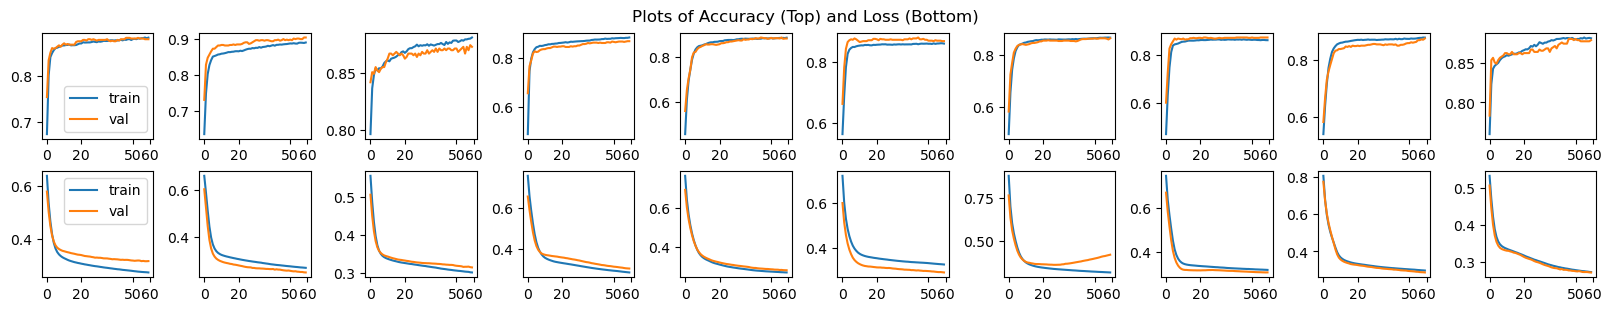

In [100]:
# Plot for all folds
fig, ax = plt.subplots(2, 10, layout="constrained", figsize = (16, 3))
fig.suptitle('Plots of Accuracy (Top) and Loss (Bottom)')
for i in range(len(histories)):
    ax[0, i].plot(histories[i][0].history['accuracy']);
    ax[0, i].plot(histories[i][0].history['val_accuracy']);
    #ax[0, i].set_title('model accuracy')
    #ax[0, i].set_ylabel('accuracy')
    #ax[0, i].set_xlabel('epoch')
    #ax[0, i].legend(['train', 'val'], loc='upper left')
    ax[0, i].set_xticks([0, 20, 50, 60])
    
    ax[1, i].plot(histories[i][0].history['loss']);
    ax[1, i].plot(histories[i][0].history['val_loss']);
    #ax[1, i].set_title('model loss')
    #ax[1, i].set_ylabel('loss')
    #ax[1, i].set_xlabel('epoch')
    #ax[1, i].legend(['train', 'val'], loc='upper left')
    ax[1, i].set_xticks([0, 20, 50, 60])

ax[0, 0].legend(['train', 'val'], loc='lower right')
ax[1, 0].legend(['train', 'val'], loc='upper right');

Description of plots:  
Above, for each fold of cross validation done, we tracked the change in training and validation performance in terms of loss and accuracy.

In [153]:
histories[2][0].history['val_loss'][-10:] # shows for the 2nd fold, the last 10 epochs reduced loss by 0.005

[0.164007768034935,
 0.16421574354171753,
 0.161006897687912,
 0.16301412880420685,
 0.16705897450447083,
 0.15851590037345886,
 0.16143402457237244,
 0.16143329441547394,
 0.15809005498886108,
 0.15911047160625458]

In [154]:
histories[6][0].history['val_loss'][-10:] # shows for the 2nd fold, the last 10 epochs has fluctuating loss

[0.20321029424667358,
 0.203443244099617,
 0.18440654873847961,
 0.19985656440258026,
 0.19874082505702972,
 0.1969597190618515,
 0.20357707142829895,
 0.17804378271102905,
 0.200942724943161,
 0.19902826845645905]

In [155]:
histories[6][0].history['val_loss'][20:30] # shows for the 2nd fold, the last 10 epochs has fluctuating loss

[0.2888741195201874,
 0.2784067690372467,
 0.2598203122615814,
 0.26955845952033997,
 0.26208579540252686,
 0.2462092787027359,
 0.26193952560424805,
 0.2724437713623047,
 0.2529255449771881,
 0.25818637013435364]

Conclusion: Training for 40 more epochs added a 2% improvement to cross-validated performance.  
From the plots, it seems like we are not overfitting for some folds since the loss is still decreasing during the last 10 epochs. On the other hand, we are overfitting in other folds as the loss fluctuates in the last 10 epochs.  
We should try 30 epochs instead. From the above indexing, it seems like 30 epochs will still be fitting well.

*Round 2 of changing epochs*

In [156]:
training_accuracies = []
fitted_data_accuracies = []

histories = {ele:[] for ele in range(k)}

for i, (train_idx, vali_idx) in enumerate(kf.split(trng_x)): ## perform k-fold cross validation

    # get current training and validation folds
    trainfold_x = trng_x.loc[train_idx] ## k-1 folds
    valifold_x = trng_x.loc[vali_idx]

    trainfold_y = trng_y.loc[train_idx] # 1 fold
    valifold_y = trng_y.loc[vali_idx]

    # set up model
    model = Sequential()
    model.add(Dense(14, input_shape=(15,), activation='relu')) # using the best # nodes = 14
    model.add(Dense(14, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit model
    history = model.fit(trainfold_x, trainfold_y, epochs = 30, batch_size = 32, 
             validation_data = (valifold_x, valifold_y), verbose = 0)
    
    histories[i].append(history)
    
    print(f"model fitted for one fold!")
    
#     # NEW! get model's accuracy on the data it was fitted on (on k-1 folds)
#     predictions = model.predict(trainfold_x, verbose = 0)
#     class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
#     table = pd.DataFrame({'actual':trainfold_y, 'pred':class_predictions})
#     cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

#     fd_accuracy = (cfm[0][0] + cfm[1][1]) / len(trainfold_y)
#     fitted_data_accuracies.append(fd_accuracy)

    # get model's cross-validated accuracy
    predictions = model.predict(valifold_x, verbose = 0)
    class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
    table = pd.DataFrame({'actual':valifold_y, 'pred':class_predictions})
    cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

    accuracy = (cfm[0][0] + cfm[1][1]) / len(valifold_y)
    training_accuracies.append(accuracy)
        
print("run has completed!")

model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
run has completed!


In [157]:
print(f"{sum(training_accuracies)/len(training_accuracies):.6f}")

0.922067


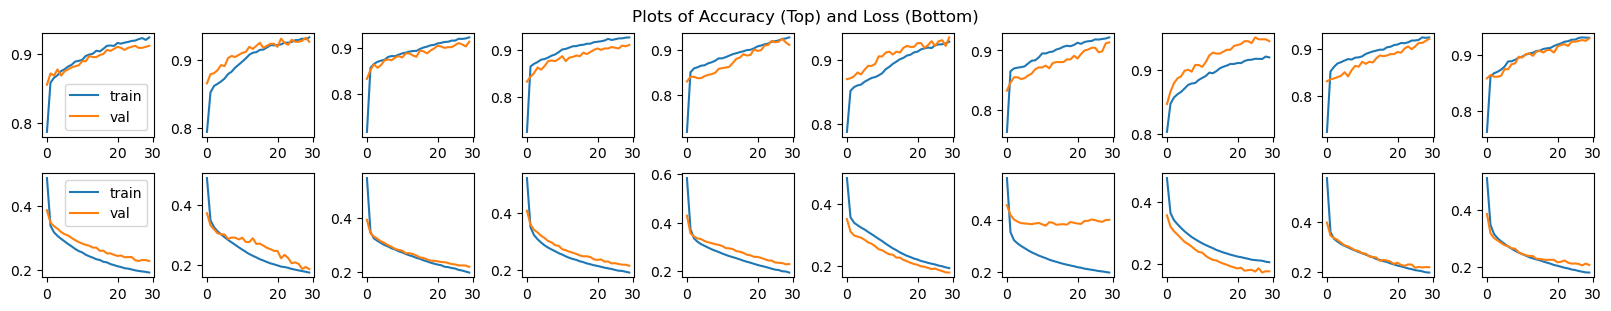

In [158]:
# Plot for all folds
fig, ax = plt.subplots(2, 10, layout="constrained", figsize = (16, 3))
fig.suptitle('Plots of Accuracy (Top) and Loss (Bottom)')
for i in range(len(histories)):
    ax[0, i].plot(histories[i][0].history['accuracy']);
    ax[0, i].plot(histories[i][0].history['val_accuracy']);
    #ax[0, i].set_title('model accuracy')
    #ax[0, i].set_ylabel('accuracy')
    #ax[0, i].set_xlabel('epoch')
    #ax[0, i].legend(['train', 'val'], loc='upper left')
    ax[0, i].set_xticks([0, 20, 30])
    
    ax[1, i].plot(histories[i][0].history['loss']);
    ax[1, i].plot(histories[i][0].history['val_loss']);
    #ax[1, i].set_title('model loss')
    #ax[1, i].set_ylabel('loss')
    #ax[1, i].set_xlabel('epoch')
    #ax[1, i].legend(['train', 'val'], loc='upper left')
    ax[1, i].set_xticks([0, 20, 30])

ax[0, 0].legend(['train', 'val'], loc='lower right')
ax[1, 0].legend(['train', 'val'], loc='upper right');

Description of plots:  
Above, for each fold of cross validation done, we tracked the change in training and validation performance in terms of loss and accuracy.

In [159]:
histories[2][0].history['val_loss'][-10:] # shows for the 2nd fold, the last 10 epochs reduced loss by 0.02

[0.23875004053115845,
 0.23589079082012177,
 0.23545140027999878,
 0.23235394060611725,
 0.22830164432525635,
 0.22701595723628998,
 0.2233523726463318,
 0.22354789078235626,
 0.22284388542175293,
 0.21809539198875427]

In [160]:
histories[6][0].history['val_loss'][-10:] # shows for the 2nd fold, the last 10 epochs has fluctuating loss

[0.3853640556335449,
 0.38401493430137634,
 0.3953365981578827,
 0.3956083059310913,
 0.4009736478328705,
 0.3980956971645355,
 0.39409562945365906,
 0.3917739987373352,
 0.3987235426902771,
 0.3995704650878906]

In [163]:
histories[6][0].history['val_loss'][10:20] # shows for the 2nd fold, the last 10 epochs has fluctuating loss

[0.38229936361312866,
 0.3773035407066345,
 0.3905906081199646,
 0.3884590268135071,
 0.3807923197746277,
 0.38215553760528564,
 0.38302162289619446,
 0.3811528980731964,
 0.3912888169288635,
 0.38832369446754456]

In [165]:
histories[6][0].history['val_loss'][7:15] # shows for the 2nd fold, the last 10 epochs has fluctuating loss

[0.3830139935016632,
 0.3856078088283539,
 0.38776108622550964,
 0.38229936361312866,
 0.3773035407066345,
 0.3905906081199646,
 0.3884590268135071,
 0.3807923197746277]

In [166]:
histories[6][0].history['val_loss'][0:10] # shows for the 2nd fold, the last 10 epochs has fluctuating loss

[0.4556325376033783,
 0.41757625341415405,
 0.4009217321872711,
 0.3925963044166565,
 0.3869978189468384,
 0.385621577501297,
 0.3844470977783203,
 0.3830139935016632,
 0.3856078088283539,
 0.38776108622550964]

In [169]:
histories[6][0].history['val_loss'][-10:] # shows for the 2nd fold, the last 10 epochs has fluctuating loss

[0.3853640556335449,
 0.38401493430137634,
 0.3953365981578827,
 0.3956083059310913,
 0.4009736478328705,
 0.3980956971645355,
 0.39409562945365906,
 0.3917739987373352,
 0.3987235426902771,
 0.3995704650878906]

Conclusion: Training for 10 more epochs added a 1% improvement to cross-validated performance.  
Taking a closer look, we are still overfitting at 20 epochs for one particular fold 6. It may be the exception.  
Looking at another fold 7, we are overfitting within the first 15 folds. For that same fold, 8 epochs is the limit before loss increases.  
I look at another fold 0, the last 10 folds have overfitted, the loss has 0.01 fluctuations.  
We should run a few more models, each with different total number of epochs, and choose from there.

*Round 3: Evaluating cross-validated accuracy for epochs 10, 15, 20*

In [170]:
training_accuracies = []
fitted_data_accuracies = []

histories = {ele:[] for ele in range(k)}

for i, (train_idx, vali_idx) in enumerate(kf.split(trng_x)): ## perform k-fold cross validation

    # get current training and validation folds
    trainfold_x = trng_x.loc[train_idx] ## k-1 folds
    valifold_x = trng_x.loc[vali_idx]

    trainfold_y = trng_y.loc[train_idx] # 1 fold
    valifold_y = trng_y.loc[vali_idx]

    # set up model
    model = Sequential()
    model.add(Dense(14, input_shape=(15,), activation='relu')) # using the best # nodes = 14
    model.add(Dense(14, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit model
    history = model.fit(trainfold_x, trainfold_y, epochs = 20, batch_size = 32, 
             validation_data = (valifold_x, valifold_y), verbose = 0)
    
    histories[i].append(history)
    
    print(f"model fitted for one fold!")
    
#     # NEW! get model's accuracy on the data it was fitted on (on k-1 folds)
#     predictions = model.predict(trainfold_x, verbose = 0)
#     class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
#     table = pd.DataFrame({'actual':trainfold_y, 'pred':class_predictions})
#     cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

#     fd_accuracy = (cfm[0][0] + cfm[1][1]) / len(trainfold_y)
#     fitted_data_accuracies.append(fd_accuracy)

    # get model's cross-validated accuracy
    predictions = model.predict(valifold_x, verbose = 0)
    class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
    table = pd.DataFrame({'actual':valifold_y, 'pred':class_predictions})
    cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

    accuracy = (cfm[0][0] + cfm[1][1]) / len(valifold_y)
    training_accuracies.append(accuracy)
        
print("run has completed!")

model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
run has completed!


In [171]:
print(f"{sum(training_accuracies)/len(training_accuracies):.6f}")

0.907730


In [172]:
training_accuracies = []
fitted_data_accuracies = []

histories = {ele:[] for ele in range(k)}

for i, (train_idx, vali_idx) in enumerate(kf.split(trng_x)): ## perform k-fold cross validation

    # get current training and validation folds
    trainfold_x = trng_x.loc[train_idx] ## k-1 folds
    valifold_x = trng_x.loc[vali_idx]

    trainfold_y = trng_y.loc[train_idx] # 1 fold
    valifold_y = trng_y.loc[vali_idx]

    # set up model
    model = Sequential()
    model.add(Dense(14, input_shape=(15,), activation='relu')) # using the best # nodes = 14
    model.add(Dense(14, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit model
    history = model.fit(trainfold_x, trainfold_y, epochs = 15, batch_size = 32, 
             validation_data = (valifold_x, valifold_y), verbose = 0)
    
    histories[i].append(history)
    
    print(f"model fitted for one fold!")
    
#     # NEW! get model's accuracy on the data it was fitted on (on k-1 folds)
#     predictions = model.predict(trainfold_x, verbose = 0)
#     class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
#     table = pd.DataFrame({'actual':trainfold_y, 'pred':class_predictions})
#     cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

#     fd_accuracy = (cfm[0][0] + cfm[1][1]) / len(trainfold_y)
#     fitted_data_accuracies.append(fd_accuracy)

    # get model's cross-validated accuracy
    predictions = model.predict(valifold_x, verbose = 0)
    class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
    table = pd.DataFrame({'actual':valifold_y, 'pred':class_predictions})
    cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

    accuracy = (cfm[0][0] + cfm[1][1]) / len(valifold_y)
    training_accuracies.append(accuracy)
        
print("run has completed!")

model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
run has completed!


In [173]:
print(f"{sum(training_accuracies)/len(training_accuracies):.6f}")

0.899970


In [175]:
training_accuracies = []
fitted_data_accuracies = []

histories = {ele:[] for ele in range(k)}

for i, (train_idx, vali_idx) in enumerate(kf.split(trng_x)): ## perform k-fold cross validation

    # get current training and validation folds
    trainfold_x = trng_x.loc[train_idx] ## k-1 folds
    valifold_x = trng_x.loc[vali_idx]

    trainfold_y = trng_y.loc[train_idx] # 1 fold
    valifold_y = trng_y.loc[vali_idx]

    # set up model
    model = Sequential()
    model.add(Dense(14, input_shape=(15,), activation='relu')) # using the best # nodes = 14
    model.add(Dense(14, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit model
    history = model.fit(trainfold_x, trainfold_y, epochs = 10, batch_size = 32, 
             validation_data = (valifold_x, valifold_y), verbose = 0)
    
    histories[i].append(history)
    
    print(f"model fitted for one fold!")
    
#     # NEW! get model's accuracy on the data it was fitted on (on k-1 folds)
#     predictions = model.predict(trainfold_x, verbose = 0)
#     class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
#     table = pd.DataFrame({'actual':trainfold_y, 'pred':class_predictions})
#     cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

#     fd_accuracy = (cfm[0][0] + cfm[1][1]) / len(trainfold_y)
#     fitted_data_accuracies.append(fd_accuracy)

    # get model's cross-validated accuracy
    predictions = model.predict(valifold_x, verbose = 0)
    class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
    table = pd.DataFrame({'actual':valifold_y, 'pred':class_predictions})
    cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

    accuracy = (cfm[0][0] + cfm[1][1]) / len(valifold_y)
    training_accuracies.append(accuracy)
        
print("run has completed!")

model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
run has completed!


In [176]:
print(f"{sum(training_accuracies)/len(training_accuracies):.6f}")

0.889668


In [177]:
training_accuracies = []
fitted_data_accuracies = []

histories = {ele:[] for ele in range(k)}

for i, (train_idx, vali_idx) in enumerate(kf.split(trng_x)): ## perform k-fold cross validation

    # get current training and validation folds
    trainfold_x = trng_x.loc[train_idx] ## k-1 folds
    valifold_x = trng_x.loc[vali_idx]

    trainfold_y = trng_y.loc[train_idx] # 1 fold
    valifold_y = trng_y.loc[vali_idx]

    # set up model
    model = Sequential()
    model.add(Dense(14, input_shape=(15,), activation='relu')) # using the best # nodes = 14
    model.add(Dense(14, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit model
    history = model.fit(trainfold_x, trainfold_y, epochs = 25, batch_size = 32, 
             validation_data = (valifold_x, valifold_y), verbose = 0)
    
    histories[i].append(history)
    
    print(f"model fitted for one fold!")
    
#     # NEW! get model's accuracy on the data it was fitted on (on k-1 folds)
#     predictions = model.predict(trainfold_x, verbose = 0)
#     class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
#     table = pd.DataFrame({'actual':trainfold_y, 'pred':class_predictions})
#     cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

#     fd_accuracy = (cfm[0][0] + cfm[1][1]) / len(trainfold_y)
#     fitted_data_accuracies.append(fd_accuracy)

    # get model's cross-validated accuracy
    predictions = model.predict(valifold_x, verbose = 0)
    class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
    table = pd.DataFrame({'actual':valifold_y, 'pred':class_predictions})
    cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

    accuracy = (cfm[0][0] + cfm[1][1]) / len(valifold_y)
    training_accuracies.append(accuracy)
        
print("run has completed!")

model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
run has completed!


In [178]:
print(f"{sum(training_accuracies)/len(training_accuracies):.6f}")

0.921020


In [179]:
training_accuracies = []
fitted_data_accuracies = []

histories = {ele:[] for ele in range(k)}

for i, (train_idx, vali_idx) in enumerate(kf.split(trng_x)): ## perform k-fold cross validation

    # get current training and validation folds
    trainfold_x = trng_x.loc[train_idx] ## k-1 folds
    valifold_x = trng_x.loc[vali_idx]

    trainfold_y = trng_y.loc[train_idx] # 1 fold
    valifold_y = trng_y.loc[vali_idx]

    # set up model
    model = Sequential()
    model.add(Dense(14, input_shape=(15,), activation='relu')) # using the best # nodes = 14
    model.add(Dense(14, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit model
    history = model.fit(trainfold_x, trainfold_y, epochs = 30, batch_size = 32, 
             validation_data = (valifold_x, valifold_y), verbose = 0)
    
    histories[i].append(history)
    
    print(f"model fitted for one fold!")
    
#     # NEW! get model's accuracy on the data it was fitted on (on k-1 folds)
#     predictions = model.predict(trainfold_x, verbose = 0)
#     class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
#     table = pd.DataFrame({'actual':trainfold_y, 'pred':class_predictions})
#     cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

#     fd_accuracy = (cfm[0][0] + cfm[1][1]) / len(trainfold_y)
#     fitted_data_accuracies.append(fd_accuracy)

    # get model's cross-validated accuracy
    predictions = model.predict(valifold_x, verbose = 0)
    class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
    table = pd.DataFrame({'actual':valifold_y, 'pred':class_predictions})
    cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

    accuracy = (cfm[0][0] + cfm[1][1]) / len(valifold_y)
    training_accuracies.append(accuracy)
        
print("run has completed!")

model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
run has completed!


In [180]:
print(f"{sum(training_accuracies)/len(training_accuracies):.6f}")

0.921170


In [181]:
0.907730 - 0.899970

0.007759999999999989

Conclusion:  
for 20 epochs, 0.907730. 
for 15 epochs, 0.899970. 
for 10 epochs, 0.889668. We continue with 25 epochs.  
for 25 epochs, 0.921020.
for 30 epochs, 0.921170.  
The observation is that 15 to 20 epochs only had a marginal 0.007 improvement. 25 to 30 epochs does not seem justified with 0.0001 improvement.

for 20 epochs, 0.907730. 
for 15 epochs, 0.899970. 
for 25 epochs, 0.921020.
for 10 epochs, 0.889668.

10 to 20 epochs is 0.01 improvement. Let's keep at 20 epochs and look at the trajectories again.

*Round 4 on the number of epochs*

In [182]:
training_accuracies = []
fitted_data_accuracies = []

histories = {ele:[] for ele in range(k)}

for i, (train_idx, vali_idx) in enumerate(kf.split(trng_x)): ## perform k-fold cross validation

    # get current training and validation folds
    trainfold_x = trng_x.loc[train_idx] ## k-1 folds
    valifold_x = trng_x.loc[vali_idx]

    trainfold_y = trng_y.loc[train_idx] # 1 fold
    valifold_y = trng_y.loc[vali_idx]

    # set up model
    model = Sequential()
    model.add(Dense(14, input_shape=(15,), activation='relu')) # using the best # nodes = 14
    model.add(Dense(14, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit model
    history = model.fit(trainfold_x, trainfold_y, epochs = 20, batch_size = 32, 
             validation_data = (valifold_x, valifold_y), verbose = 0)
    
    histories[i].append(history)
    
    print(f"model fitted for one fold!")
    
#     # NEW! get model's accuracy on the data it was fitted on (on k-1 folds)
#     predictions = model.predict(trainfold_x, verbose = 0)
#     class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
#     table = pd.DataFrame({'actual':trainfold_y, 'pred':class_predictions})
#     cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

#     fd_accuracy = (cfm[0][0] + cfm[1][1]) / len(trainfold_y)
#     fitted_data_accuracies.append(fd_accuracy)

    # get model's cross-validated accuracy
    predictions = model.predict(valifold_x, verbose = 0)
    class_predictions = [(ele[0] > 0.5).astype(int) for ele in predictions]
    table = pd.DataFrame({'actual':valifold_y, 'pred':class_predictions})
    cfm = pd.crosstab(table['actual'], table['pred'], rownames=['actual'], colnames=['pred'])

    accuracy = (cfm[0][0] + cfm[1][1]) / len(valifold_y)
    training_accuracies.append(accuracy)
        
print("run has completed!")

model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
model fitted for one fold!
run has completed!


In [183]:
print(f"{sum(training_accuracies)/len(training_accuracies):.6f}")

0.911166


In [186]:
min(histories[4][0].history['val_loss'])

0.24771705269813538

In [187]:
histories[4][0].history['val_loss'].index(min(histories[4][0].history['val_loss']))

19

In [188]:
histories[4][0].history['val_loss'][19]

0.24771705269813538

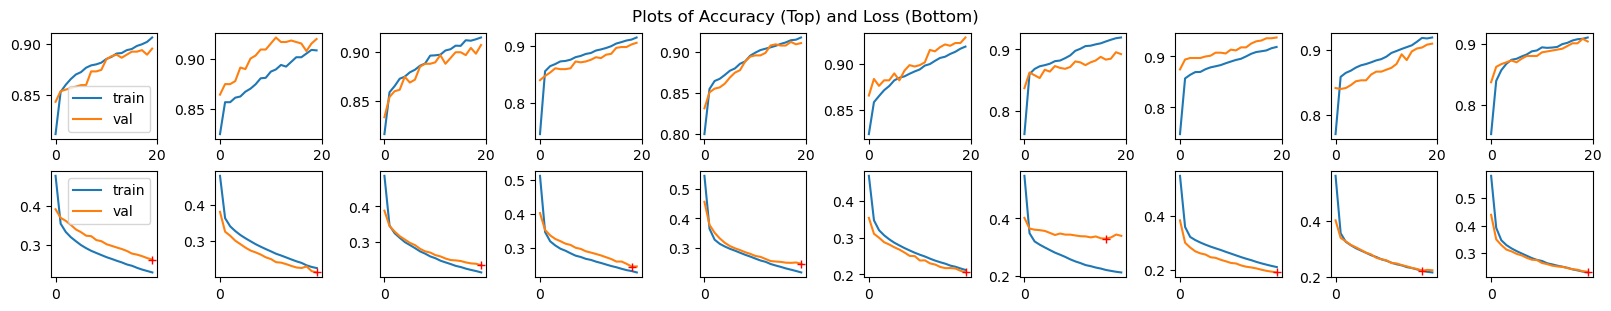

In [193]:
# Plot for all folds
fig, ax = plt.subplots(2, 10, layout="constrained", figsize = (16, 3))
fig.suptitle('Plots of Accuracy (Top) and Loss (Bottom)')
for i in range(len(histories)):
    ax[0, i].plot(histories[i][0].history['accuracy']);
    ax[0, i].plot(histories[i][0].history['val_accuracy']);
    #ax[0, i].set_title('model accuracy')
    #ax[0, i].set_ylabel('accuracy')
    #ax[0, i].set_xlabel('epoch')
    #ax[0, i].legend(['train', 'val'], loc='upper left')
    ax[0, i].set_xticks([0, 20])
    
    ax[1, i].plot(histories[i][0].history['loss']);
    ax[1, i].plot(histories[i][0].history['val_loss']);
    #ax[1, i].set_title('model loss')
    #ax[1, i].set_ylabel('loss')
    #ax[1, i].set_xlabel('epoch')
    #ax[1, i].legend(['train', 'val'], loc='upper left')
    ax[1, i].set_xticks([0, 20])
    
    the_min = min(histories[i][0].history['val_loss'])
    min_loc = histories[i][0].history['val_loss'].index(the_min)
    ax[1, i].plot([min_loc], [the_min], "r+")

ax[0, 0].legend(['train', 'val'], loc='lower right')
ax[1, 0].legend(['train', 'val'], loc='upper right');

Description of plots:  
Above, for each fold of cross validation done, we tracked the change in training and validation performance in terms of loss and accuracy.

Conclusion: 20 epochs - 0.911166. Based on the plots, besides for one fold, 20 epochs is okay.  
Continue ahead with 20 epochs. 

**final network configuration**  
hidden 1 nodes: 4   
hidden 2 nodes: nil  
dropout btw input n hl1: nil  
batch size: 64  
epochs: 20  

*fit on whole training set, evaluate model on validation set (before threshold tuning)*

In [101]:
model_two = Sequential()
model_two.add(Dense(4, input_shape=(15,), activation='relu'))
model_two.add(Dense(1, activation='sigmoid'))

model_two.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=[])

model_two.fit(trng_x, trng_y, epochs=20, batch_size=64, verbose = 0);
print("model has been fitted")

model has been fitted


In [102]:
predictions_two = model_two.predict(vali_x)

22/22 [==============================] - 0s 2ms/step


In [103]:
class_predictions_two_ptone = [(ele[0] > 0.5).astype(int) for ele in predictions_two]
table_two_ptone = pd.DataFrame({'actual':vali_y, 'pred':class_predictions_two_ptone})
cfm_two_ptone = pd.crosstab(table_two_ptone['actual'], table_two_ptone['pred'], 
                            rownames=['actual'], colnames=['pred'])

In [104]:
cfm_two_ptone

pred,0,1
actual,,
0,432,220
1,1,20


In [105]:
prec_two_ptone = sklearn.metrics.precision_score(y_true = vali_y, 
                                                 y_pred = class_predictions_two_ptone, 
                                                 zero_division = 0)
rec_two_ptone = sklearn.metrics.recall_score(y_true = vali_y, 
                                             y_pred = class_predictions_two_ptone, 
                                             zero_division = 0)
f2_two_ptone = sklearn.metrics.fbeta_score(y_true = vali_y, 
                                           y_pred = class_predictions_two_ptone, 
                                           beta = 2)

print(f"precision is {prec_two_ptone:.6f}")
print(f"recall is {rec_two_ptone:.6f}")
print(f"f2 is {f2_two_ptone:.6f}")
print(f"fpr is {fpr(cfm_two_ptone):.6f}")

precision is 0.083333
recall is 0.952381
f2 is 0.308642
fpr is 0.337423


*find the best threshold using validation set*

In [106]:
f2_val_two = []
prec_val_two = []
rec_val_two = []

threshold_values = np.linspace(0, 1, 21)

for thres in threshold_values:
    class_predictions = [(ele[0] > thres).astype(int) for ele in predictions_two]
    
    prec_met = sklearn.metrics.precision_score(y_true = vali_y, y_pred = class_predictions, zero_division = 0)
    rec_met = sklearn.metrics.recall_score(y_true = vali_y, y_pred = class_predictions, zero_division = 0)
    f2_met = sklearn.metrics.fbeta_score(y_true = vali_y, y_pred = class_predictions, beta = 2)
    
    f2_val_two.append(f2_met)
    prec_val_two.append(prec_met)
    rec_val_two.append(rec_met)

In [107]:
df_two = pd.DataFrame({'threshold': threshold_values, 
              'precision' : prec_val_one, 
              'recall': rec_val_one, 
              'f2': f2_val_one})

In [202]:
df_two.to_csv("C:\\Users\\joann\\Downloads\\ST4248\\project\\df_two.csv")

In [108]:
df_two

,threshold,precision,recall,f2
0,0.00,0.031204,1.000000,0.138705
1,0.05,0.041750,1.000000,0.178876
2,0.10,0.049412,1.000000,0.206287
3,0.15,0.054688,1.000000,0.224359
4,0.20,0.060000,1.000000,0.241935
5,0.25,0.065217,1.000000,0.258621
6,0.30,0.069307,1.000000,0.271318
7,0.35,0.073171,1.000000,0.283019
8,0.40,0.074627,0.952381,0.284091
9,0.45,0.079365,0.952381,0.297619


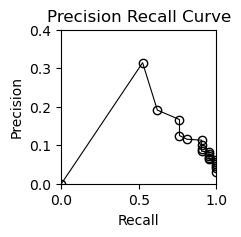

In [109]:
# plot PRC
plt.figure(figsize=(2, 2))
plt.plot(rec_val_two, prec_val_two, "ko-", markerfacecolor = "none", lw = 0.8)
plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 0.4]);

*evaluate performance on validation with selected threshold*

In [115]:
threshold_two = 0.50
class_predictions_two_pttwo = [(ele[0] > threshold_two).astype(int) for ele in predictions_two]
table_two_pttwo = pd.DataFrame({'actual':vali_y, 'pred':class_predictions_two_pttwo})
cfm_two_pttwo = pd.crosstab(table_two_pttwo['actual'], table_two_pttwo['pred'], 
                            rownames=['actual'], colnames=['pred'])

In [116]:
cfm_two_pttwo

pred,0,1
actual,,
0,432,220
1,1,20


In [117]:
prec_two_pttwo = sklearn.metrics.precision_score(y_true = vali_y, 
                                                 y_pred = class_predictions_two_pttwo, 
                                                 zero_division = 0)
rec_two_pttwo = sklearn.metrics.recall_score(y_true = vali_y, 
                                             y_pred = class_predictions_two_pttwo, 
                                             zero_division = 0)
f2_two_pttwo = sklearn.metrics.fbeta_score(y_true = vali_y, 
                                           y_pred = class_predictions_two_pttwo, 
                                           beta = 2)

print(f"precision is {prec_two_pttwo:.6f}")
print(f"recall is {rec_two_pttwo:.6f}")
print(f"f2 is {f2_two_pttwo:.6f}")
print(f"fpr is {fpr(cfm_two_pttwo):.6f}")

precision is 0.083333
recall is 0.952381
f2 is 0.308642
fpr is 0.337423


*evaluate performance on test set*

In [118]:
predictions_two_test = model_two.predict(test_x)

class_predictions_two_test = [(ele[0] > threshold_two).astype(int) for ele in predictions_two_test]
table_two_test = pd.DataFrame({'actual':test_y, 'pred':class_predictions_two_test})
cfm_two_test = pd.crosstab(table_two_test['actual'], table_two_test['pred'], 
                            rownames=['actual'], colnames=['pred'])

64/64 [==============================] - 0s 1ms/step


In [119]:
cfm_two_test

pred,0,1
actual,,
0,1311,641
1,2,69


In [211]:
prec_two_test = sklearn.metrics.precision_score(y_true = test_y, 
                                                 y_pred = class_predictions_two_test, 
                                                 zero_division = 0)
rec_two_test = sklearn.metrics.recall_score(y_true = test_y, 
                                             y_pred = class_predictions_two_test, 
                                             zero_division = 0)
f2_two_test = sklearn.metrics.fbeta_score(y_true = test_y, 
                                           y_pred = class_predictions_two_test, 
                                           beta = 2)

print(f"precision is {prec_two_test:.6f}")
print(f"recall is {rec_two_test:.6f}")
print(f"f2 is {f2_two_test:.6f}")
print(f"fpr is {fpr(cfm_two_test):.6f}")

precision is 0.115152
recall is 0.802817
f2 is 0.365854
fpr is 0.224385


### End of Document